In [52]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from planar_code import PlanarCode
from graph_operations import *
from visualization import *

L, W = (5, 5)
#p = np.full((L,W,2), 0.1)
#p_dual = np.full((L-1,W+1,2), 0.05)
p=0.1
p_dual=0.1
planar_code = PlanarCode(L=L, W=W, p=p, p_dual=p_dual, boundaries=np.array((1,0), dtype=int))

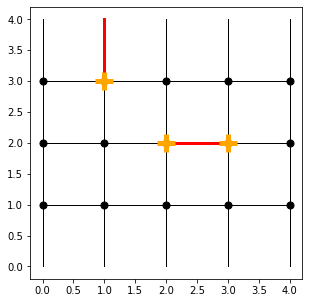

In [53]:
planar_code.primal.apply_edge_operator((1,3,1))
planar_code.primal.apply_edge_operator((2,2,0))
plot_planar_code(planar_code, plot_dual=False, show_errors=True, show_syndrome=True)

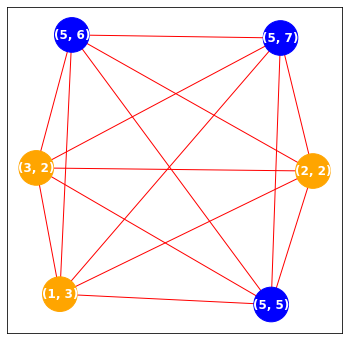

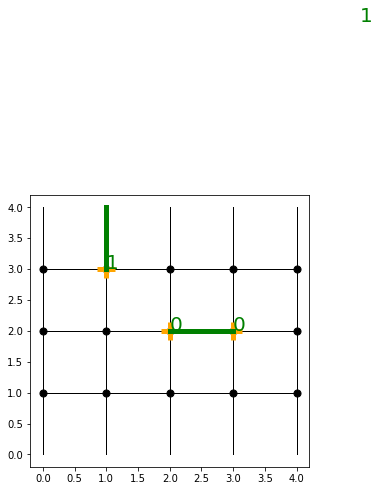

In [74]:
lattice = planar_code.primal
syndrome = lattice.measure_syndrome()
graph, _ = syndrome_to_matching_graph(lattice, syndrome)

fig, ax = plt.subplots(1,1,figsize=(6,6))
nx.drawing.nx_pylab.draw_networkx(
    graph, ax=ax,
    node_size=1200,
    node_color=3*['orange'] + 3*['blue'],
    edge_color='red',
    font_color='white',
    font_weight='bold'
)

plot_matchings(lattice, syndrome)

[[(5, 3), (6, 3), (7, 3), (7, 4), (7, 5)]]


0

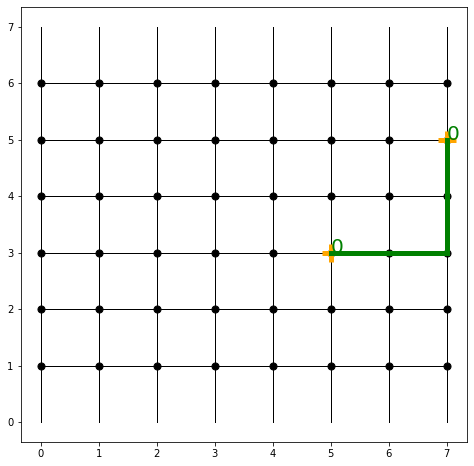

In [70]:
lattice = PlanarLattice(8, 8, boundaries=(1,0), p=0.05)
lattice.apply_edge_operator((7, [3,4], 1))
lattice.apply_edge_operator(([5,6], 3, 0))
syndrome = lattice.measure_syndrome()
plot_matchings(lattice, syndrome, pathfinding='manhattan')
matchings, paths = min_weight_syndrome_matching(lattice, syndrome, pathfinding='manhattan')
print(paths)
for path in paths:
    lattice.apply_edge_operators(path)
lattice.detect_logical_errors()

1


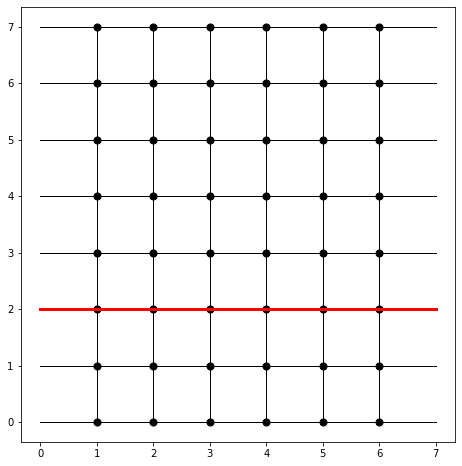

In [2]:
lattice = planar_code.primal
lattice.reset()
syndrome = planar_code.measure_syndrome()[0]

lattice.apply_edge_operator((0, slice(None), 1))
lattice.apply_edge_operator((slice(None), 2, 0))
plot_planar_code(planar_code, plot_dual=False, show_errors=True, show_syndrome=True)
print(lattice.detect_logical_errors())